<a href="https://colab.research.google.com/github/Sarath-Mohan9469545/tsa/blob/main/tsa_acf_n02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
series=pd.read_csv("/content/PFE_US_Equity.csv",index_col="Date")
series

,PX_LAST,PX_VOLUME
Date,,
5/1/2015,32.3061,21543362
5/4/2015,32.5336,23590434
5/5/2015,32.3440,22382158
5/6/2015,31.7184,26859481
5/7/2015,31.8321,21508469
...,...,...
5/10/2021,39.8600,30831871
5/11/2021,39.3500,30568572
5/12/2021,39.6900,26208608


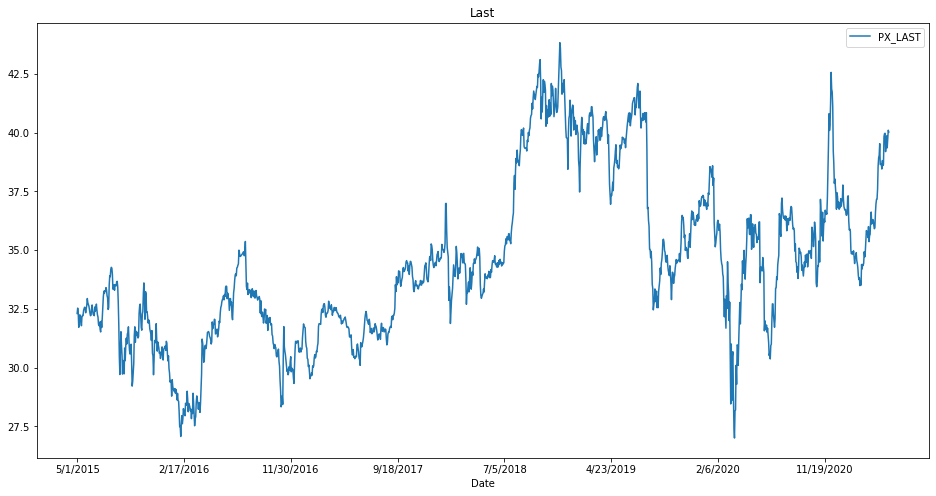

In [ ]:
import matplotlib.pyplot as plt
series2=series.drop(['PX_VOLUME'], axis = 1)
series3=series.drop(['PX_LAST'], axis = 1)
series2.plot(figsize=(16,8))
plt.title("Last")
plt.show()

In [ ]:
print(series2)

           PX_LAST
Date              
5/1/2015   32.3061
5/4/2015   32.5336
5/5/2015   32.3440
5/6/2015   31.7184
5/7/2015   31.8321
...            ...
5/10/2021  39.8600
5/11/2021  39.3500
5/12/2021  39.6900
5/13/2021  40.1000
5/14/2021  40.0200

[1521 rows x 1 columns]


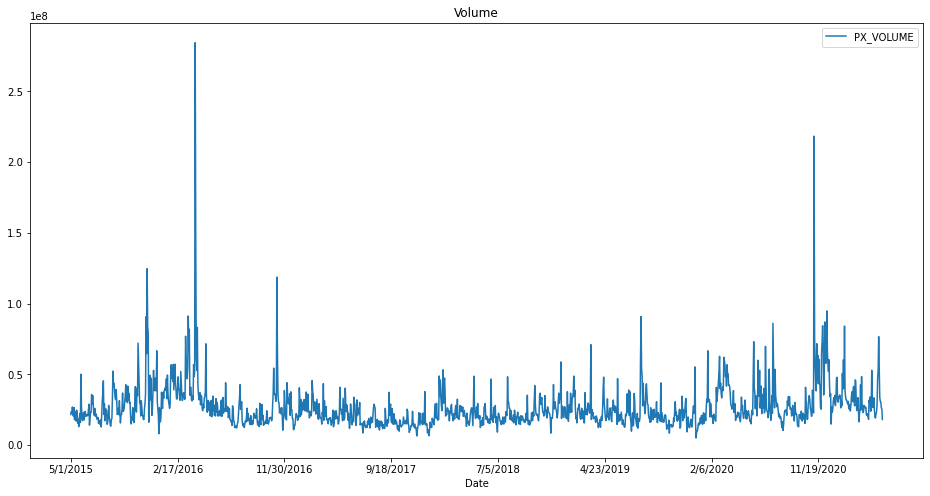

In [ ]:
series3.plot(figsize=(16,8))
plt.title("Volume")
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


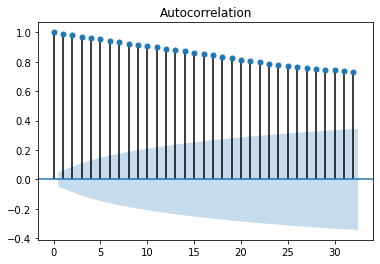

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(series2)
plt.show()

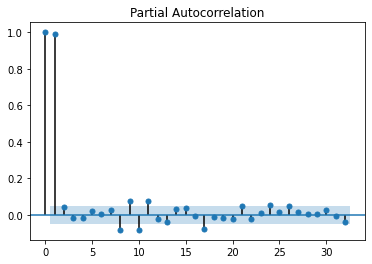

In [ ]:
plot_pacf(series2)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f906bbb2990>]],
      dtype=object)

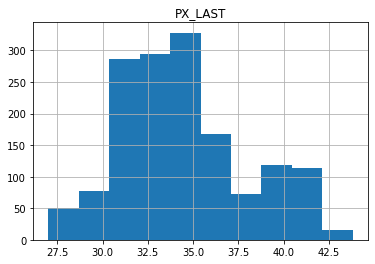

In [ ]:
series2.hist()

In [ ]:
y=series2.values
split=round(len(y)/2)
x1,x2=y[0:split],y[split:]
mean1,mean2=x1.mean(),x2.mean()
var1,var2=x1.var(),x2.var()
print("Mean13=",mean1,"Mean23=",mean2,"Variance13=",var1,"Variance23=",var2)

Mean13= 32.04194710526316 Mean23= 36.887129434954005 Variance13= 3.144702281228463 Variance23= 9.367976141183519


In [20]:
from statsmodels.tsa.stattools import adfuller
col_list=["Date", "PX_LAST"]
x=pd.read_csv("/content/PFE_US_Equity.csv",index_col="Date",usecols=col_list,squeeze=True).values
result=adfuller(x)
print(result)

(-2.4702183180834103, 0.1228896857907556, 16, 1504, {'1%': -3.4347053829922043, '5%': -2.863463625572207, '10%': -2.5677941141530387}, 2007.6439363715044)


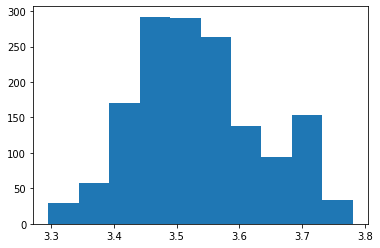

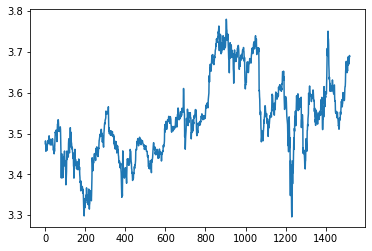

In [26]:
from numpy import log

logx=log(x)
plt.hist(logx)
plt.show()
plt.plot(logx)
plt.show()

In [27]:
y=logx
split=round(len(y)/2)
x1,x2=y[0:split],y[split:]
mean1,mean2=x1.mean(),x2.mean()
var1,var2=x1.var(),x2.var()
print("Mean13=",mean1,"Mean23=",mean2,"Variance13=",var1,"Variance23=",var2)

Mean13= 3.4654908778144664 Mean23= 3.6043781758844102 Variance13= 0.003135811212063039 Variance23= 0.007021013271008528


In [29]:
result=adfuller(log(pd.read_csv("/content/PFE_US_Equity.csv",index_col="Date",usecols=col_list,squeeze=True).values))
print(result)

(-2.495441376982762, 0.11658743059799376, 16, 1504, {'1%': -3.4347053829922043, '5%': -2.863463625572207, '10%': -2.5677941141530387}, -8556.372852834336)


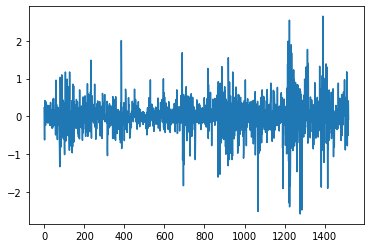

In [31]:
from pandas import Series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)
diff = difference(x)
plt.plot(diff)
plt.show()

In [32]:
y=diff
split=round(len(y)/2)
x1,x2=y[0:split],y[split:]
mean1,mean2=x1.mean(),x2.mean()
var1,var2=x1.var(),x2.var()
print("Mean13=",mean1,"Mean23=",mean2,"Variance13=",var1,"Variance23=",var2)

Mean13= [0.0011225] Mean23= [0.00902737] Variance13= 0.12870115075790511 Variance23= 0.32245231511296013


In [34]:
import numpy as np
sqrtseries=np.sqrt(series[["PX_LAST"]])

In [35]:
print(sqrtseries)

            PX_LAST
Date               
5/1/2015   5.683846
5/4/2015   5.703823
5/5/2015   5.687179
5/6/2015   5.631909
5/7/2015   5.641994
...             ...
5/10/2021  6.313478
5/11/2021  6.272958
5/12/2021  6.300000
5/13/2021  6.332456
5/14/2021  6.326136

[1521 rows x 1 columns]


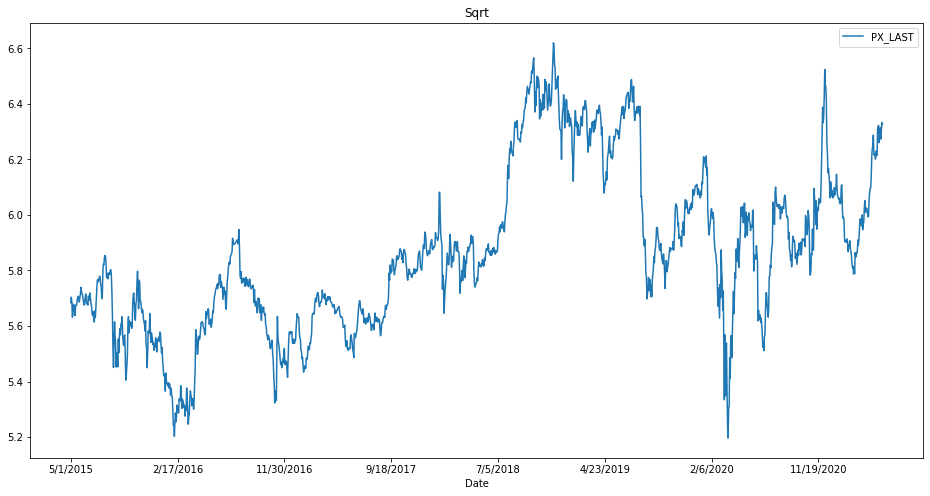

In [36]:
sqrtseries.plot(figsize=(16,8))
plt.title("Sqrt")
plt.show()

In [37]:
y=sqrtseries
split=round(len(y)/2)
x1,x2=y[0:split],y[split:]
mean1,mean2=x1.mean(),x2.mean()
var1,var2=x1.var(),x2.var()
print("Mean13=",mean1,"Mean23=",mean2,"Variance13=",var1,"Variance23=",var2)

Mean13= PX_LAST    5.65837
dtype: float64 Mean23= PX_LAST    6.068209
dtype: float64 Variance13= PX_LAST    0.024833
dtype: float64 Variance23= PX_LAST    0.064054
dtype: float64


In [38]:
result=adfuller(np.sqrt(pd.read_csv("/content/PFE_US_Equity.csv",index_col="Date",usecols=col_list,squeeze=True).values))
print(result)

(-2.481845308756026, 0.11995427426255845, 16, 1504, {'1%': -3.4347053829922043, '5%': -2.863463625572207, '10%': -2.5677941141530387}, -5356.903804938993)
